In [ ]:
conda install -c conda-forge cartopy -y

Anaconda Inc has modified their terms of service for anaconda repositories. In a potentially breaking change Databricks will soon remove default conda channel configuration on this runtime. Read more: https://docs.microsoft.com/azure/databricks/libraries/notebooks-python-libraries#manage-libraries-with-conda-commands
Python interpreter will be restarted.
Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

 environment location: /local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418

 added / updated specs:
 - cartopy


The following packages will be UPDATED:

 ca-certificates pkgs/main::ca-certificates-2021.5.25-~ --> conda-forge::ca-certificates-2021.5.30-ha878542_0

The following packages will be SUPERSEDED by a higher-priority channel:

 certifi pkgs/main::certifi-2021.5.30-py37h06a~ --> conda-forge::certifi-2021.5.30-py37h89c1867_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


==> WARNING: A newer version of conda exists. <==
 current version: 4.8.2
 latest version: 4.10.1

Please update conda by running

 $ conda update -n base -c defaults conda


Python interpreter will be restarted.

In [ ]:
conda install dask -y

Anaconda Inc has modified their terms of service for anaconda repositories. In a potentially breaking change Databricks will soon remove default conda channel configuration on this runtime. Read more: https://docs.microsoft.com/azure/databricks/libraries/notebooks-python-libraries#manage-libraries-with-conda-commands
Python interpreter will be restarted.
Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

 environment location: /local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418

 added / updated specs:
 - dask


The following packages will be SUPERSEDED by a higher-priority channel:

 ca-certificates conda-forge::ca-certificates-2021.5.3~ --> pkgs/main::ca-certificates-2021.5.25-h06a4308_1
 certifi conda-forge::certifi-2021.5.30-py37h8~ --> pkgs/main::certifi-2021.5.30-py37h06a4308_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


==> WARNING: A newer version of conda exists. <==
 current version: 4.8.2
 latest version: 4.10.1

Please update conda by running

 $ conda update -n base -c defaults conda


Python interpreter will be restarted.

In [ ]:
#import libraries from local directory 
import os
import sys
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import feedparser
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from datetime import datetime
from datetime import timedelta
import smtplib
from smtplib import SMTP_SSL as SMTP
import geopandas as gpd
import fiona
from ftplib import FTP
import shutil
from os.path import relpath
import re
import zipfile
from os.path import relpath
from os import listdir
from os.path import isfile, join
from pybufrkit.decoder import Decoder
from pybufrkit.renderer import FlatTextRenderer
from sys import platform
from io import StringIO
from bs4 import BeautifulSoup
import subprocess
import netCDF4
decoder = Decoder()
path='/dbfs/mnt/TyphoonDatasetPipeline/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/'
##Path='home/fbf/'
sys.path.insert(0, path+'lib')


In [ ]:
#from settings import fTP_LOGIN, fTP_PASSWORD, uCL_USERNAME, uCL_PASSWORD
#from settings import *
#from secrets import *
#from variables import *
#from ecmwfDataDownload import Ecmwf_data
from JtcwDataDownload import Jtcw_data
from uclDataDownload import ucl_data
#from notification import Sendemail
from CheckActiveTyphoon import Check_for_active_typhoon
from RainfallDataDownload import Rainfall_data
from climada.hazard import Centroids, TropCyclone,TCTracks
from climada.hazard.tc_tracks import estimate_roci,estimate_rmw
from climada.hazard.tc_tracks_forecast import TCForecast

In [ ]:
typhoon_events=pd.read_csv('/dbfs/mnt/TyphoonDatasetPipeline/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data/typhoon_events.csv')
typoon_event=[]
for index, row in typhoon_events.iterrows():
    typoon_event.append(str(row['International_Name']).upper()+str(row['year']))


In [ ]:
typhoon_events

Out[16]:

,Local_name,International_Name,year
0,Reming,Durian,2006
1,Frank,Fengshen,2008
2,Ondoy,ketsana,2009
3,Basyang,conson,2010
4,Pedring,Nesat,2011
5,Pablo,Bopha,2012
6,Maring,Trami,2013
7,Odette,Usagi,2013
8,Santi,Nari,2013
9,Vinta/rosa,Krosa,2013


In [ ]:
typhoon_events=pd.read_csv('/dbfs/mnt/TyphoonDatasetPipeline/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data/typhoon_events.csv')
typhoon_events=[typhoon.upper() for typhoon in list(typhoon_events.International_Name.values)]
sel_ibtracs = TCTracks()
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs.read_ibtracs_netcdf(provider='usa', year_range=(2006, 2021), basin='WP', correct_pres=False)
Typhoons=TCTracks()
Typhoons.data=[tr for tr in sel_ibtracs.data if (tr.name+tr.sid[:4]) in typoon_event ]

2021-06-09 14:35:30,376 - climada.hazard.tc_tracks - WARNING - No valid wind/pressure values found for 2006184N16110, 2007276N20147, 2008223N27151, 2009291N16111, 2009328N06108, 2010200N26127, 2011151N19116, 2013241N29169, 2014160N21120, 2014231N21117, 2016250N25125, 2016347N10110, 2017305N08108, 2019176N18128, 2019250N24123.
2021-06-09 14:35:32,513 - climada.hazard.tc_tracks - INFO - Progress: 10%
2021-06-09 14:35:34,066 - climada.hazard.tc_tracks - INFO - Progress: 20%
2021-06-09 14:35:35,661 - climada.hazard.tc_tracks - INFO - Progress: 30%
2021-06-09 14:35:37,171 - climada.hazard.tc_tracks - INFO - Progress: 40%
2021-06-09 14:35:38,711 - climada.hazard.tc_tracks - INFO - Progress: 50%
2021-06-09 14:35:40,218 - climada.hazard.tc_tracks - INFO - Progress: 60%
2021-06-09 14:35:42,097 - climada.hazard.tc_tracks - INFO - Progress: 70%
2021-06-09 14:35:43,582 - climada.hazard.tc_tracks - INFO - Progress: 80%
2021-06-09 14:35:45,142 - climada.hazard.tc_tracks - INFO - Progress: 90%

/local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
 warnings.warn('The .xlabels_top attribute is deprecated. Please '
/local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
 warnings.warn('The .ylabels_right attribute is deprecated. Please '
Out[18]:

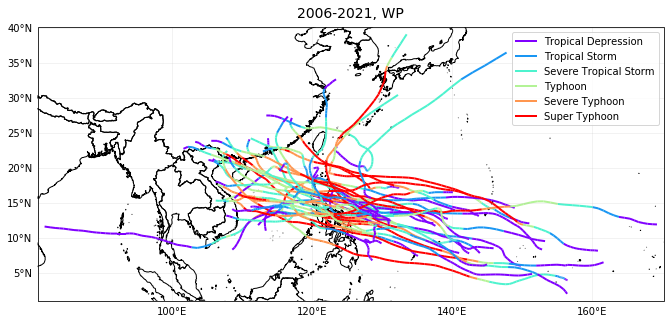

Text(0.5, 1, '2006-2021, WP')

In [ ]:
ax = Typhoons.plot()
ax.get_legend()._loc = 1 # correct legend location
ax.set_title('2006-2021, WP',fontsize = 14) # set title


/local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
 return _prepare_from_string(" ".join(pjargs))
Out[19]:

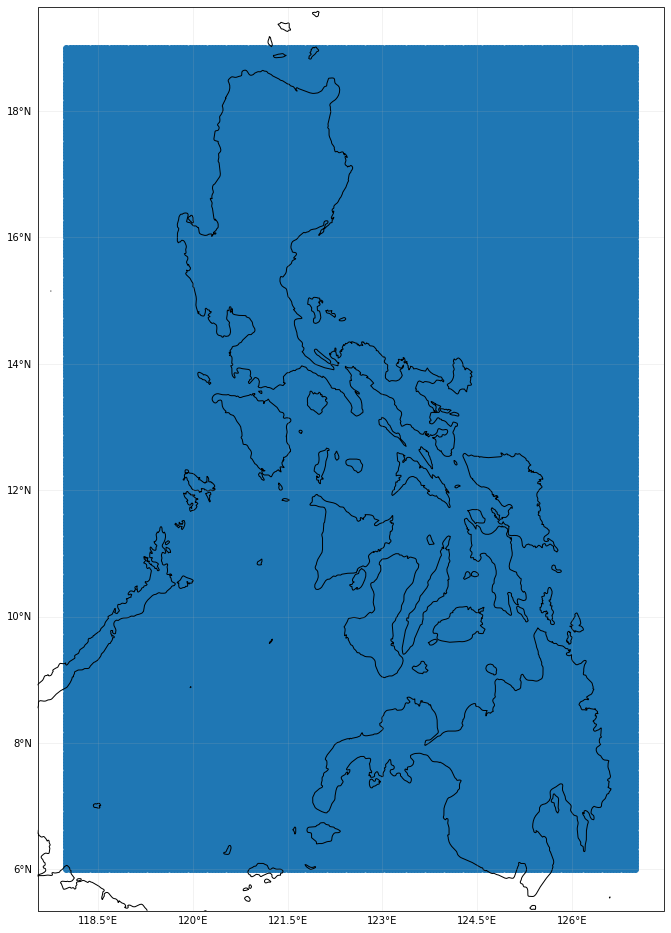

<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f6d5a117f50>

In [ ]:
cent = Centroids()
cent.set_raster_from_pnt_bounds((118,6,127,19), res=0.05)
cent.check()
cent.plot()



In [ ]:
df = pd.DataFrame(data=cent.coord)
df["centroid_id"] = "id"+(df.index).astype(str)  
centroid_idx=df["centroid_id"].values
ncents = cent.size
df=df.rename(columns={0: "lat", 1: "lon"})
#calculate wind field for each ensamble members 

In [ ]:
def adjust_tracks(forcast_df):
    track = xr.Dataset(
        data_vars={
            'max_sustained_wind': ('time', 0.514444*forcast_df.max_sustained_wind.values),
            'environmental_pressure': ('time', forcast_df.environmental_pressure.values),
            'central_pressure': ('time',forcast_df.central_pressure.values),
            'lat': ('time',forcast_df.lat.values),
            'lon': ('time', forcast_df.lon.values),
            'radius_max_wind':('time', forcast_df.radius_max_wind.values),  
            'radius_oci':('time',forcast_df.radius_oci.values), 
            'time_step':('time',np.full_like(forcast_df.time_step.values, 3, dtype=float)),
        },
        coords={
            'time': forcast_df.time.values,
        },
        attrs={
            'max_sustained_wind_unit': 'm/s',
            'central_pressure_unit': 'mb',
            'name': forcast_df.name,
            'sid': forcast_df.sid,#+str(forcast_df.ensemble_number),
            'orig_event_flag': forcast_df.orig_event_flag,
            'data_provider': forcast_df.data_provider,
            'id_no': forcast_df.id_no,
            'basin': forcast_df.basin,
            'category': forcast_df.category,
        }
    )
    track = track.set_coords(['lat', 'lon'])
    return track

In [ ]:
tracks=TCTracks()
tracks.data=[adjust_tracks(tr) for tr in  Typhoons.data]

Out[21]:

<xarray.Dataset>
Dimensions: (time: 733)
Coordinates:
 * time (time) datetime64[ns] 2006-11-24T12:00:00 ... 200...
 lon (time) float64 149.8 149.7 149.6 ... 81.93 81.8
 lat (time) float64 6.1 6.115 6.131 ... 11.66 11.68 11.7
Data variables:
 max_sustained_wind (time) float64 7.717 7.717 7.717 ... 7.717 7.717
 environmental_pressure (time) float64 1.008e+03 1.008e+03 ... 1.006e+03
 central_pressure (time) float64 1.006e+03 1.006e+03 ... 1.006e+03
 radius_max_wind (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
 radius_oci (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
 time_step (time) float64 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
Attributes:
 max_sustained_wind_unit: m/s
 central_pressure_unit: mb
 name: DURIAN
 sid: 2006329N06150
 orig_event_flag: True
 data_provider: usa
 id_no: 2006329006150.0
 basin: WP
 category: 4 xarray.Dataset Dimensions: time : 733 Coordinates: (3) time (time) datetime64[ns] 2006-11-24T12:00:00 ... 2006-12-... array(['2006-11-24T12:00:00.000000000', '2006-11-24T12:30:00.000000000',
 '2006-11-24T13:00:00.000000000', ..., '2006-12-09T17:00:00.000000000',
 '2006-12-09T17:30:00.000000000', '2006-12-09T18:00:00.000000000'],
 dtype='datetime64[ns]') lon (time) float64 149.8 149.7 149.6 ... 81.93 81.8 array([149.80000305, 149.71497469, 149.63003505, 149.54524997,
 149.46068528, 149.37640683, 149.29248047, 149.20897202,
 149.12594734, 149.04347226, 148.96161263, 148.88043428,
 148.80000305, 148.7203766 , 148.64157977, 148.56362924,
 148.48654165, 148.41033367, 148.33502197, 148.26060972,
 148.18704616, 148.11426704, 148.04220812, 147.97080515,
 147.8999939 , 147.82978418, 147.76048212, 147.6924679 ,
 147.62612172, 147.56182376, 147.49995422, 147.44057997,
 147.38251457, 147.32425828, 147.26431135, 147.20117402,
 147.13334656, 147.05977381, 146.98117908, 146.89873026,
 146.81359527, 146.726942 , 146.63993835, 146.55358575,
 146.46821964, 146.38400899, 146.30112276, 146.2197299 ,
 146.13999939, 146.06205281, 145.98582226, 145.91119248,
 145.83804819, 145.76627412, 145.695755 , 145.62623203,
 145.55687226, 145.48669922, 145.41473642, 145.34000739,
 145.26153564, 145.17860679, 145.09155476, 145.00097556,
 144.9074652 , 144.81161969, 144.71403503, 144.61522064,
 144.51533948, 144.41446789, 144.31268225, 144.2100589 ,
 144.10667419, 144.00258833, 143.89779681, 143.79227897,
 143.68601414, 143.57898167, 143.47116089, 143.36261665,
...
 90.26085467, 90.13974207, 90.02174774, 89.90809397,
 89.80000305, 89.69829535, 89.6021835 , 89.51047818,
 89.42199011, 89.33552996, 89.24990845, 89.16399555,
 89.07689843, 88.98778356, 88.89581738, 88.80016636,
 88.69999695, 88.59474252, 88.48490406, 88.37124948,
 88.25454669, 88.13556358, 88.01506805, 87.89381259,
 87.77248792, 87.65176933, 87.53233212, 87.4148516 ,
 87.30000305, 87.18824584, 87.07917553, 86.97217178,
 86.86661423, 86.76188251, 86.65735626, 86.55241618,
 86.44644714, 86.33883507, 86.22896591, 86.11622557,
 86. , 85.87989513, 85.75639698, 85.63021155,
 85.50204488, 85.37260297, 85.24259186, 85.11276335,
 84.98405242, 84.85743984, 84.7339064 , 84.61443286,
 84.5 , 84.39124446, 84.28742638, 84.18746178,
 84.09026666, 83.99475704, 83.89984894, 83.80454018,
 83.70815592, 83.61010311, 83.50978872, 83.40661971,
 83.30000305, 83.18949859, 83.0752777 , 82.95766466,
 82.83698371, 82.71355912, 82.58771515, 82.45977606,
 82.33006613, 82.19890959, 82.06663073, 81.93355379,
 81.80000305]) lat (time) float64 6.1 6.115 6.131 ... 11.68 11.7 array([ 6.0999999 , 6.1152931 , 6.13144771, 6.1487348 , 6.16742537,
 6.18779047, 6.21010113, 6.23462838, 6.26164325, 6.29141678,
 6.32421999, 6.36032393, 6.39999962, 6.44347977, 6.49084379,
 6.54213276, 6.59738776, 6.65664989, 6.71996021, 6.78695642,
 6.85566258, 6.92369934, 6.98868738, 7.04824734, 7.0999999 ,
 7.14319352, 7.1835878 , 7.22857018, 7.28552806, 7.36184888,
 7.46492004, 7.59907898, 7.75646312, 7.9261599 , 8.09725678,
 8.25884119, 8.40000057, 8.5125368 , 8.59910948, 8.66509264,
 8.71586031, 8.75678652, 8.79324532, 8.82968883, 8.86

In [ ]:
tracks1=TCTracks()
tracks1.data=tracks.data[0]
#tracks1.equal_timestep(0.5)

In [ ]:
# define a new typhoon class
TYphoon = TropCyclone()
TYphoon.set_from_tracks(tracks1, cent, store_windfields=True)

--------------------------------------------------------------------------- 
 CPLE_AppDefinedError Traceback (most recent call last)
 rasterio/_crs.pyx in rasterio._crs._CRS.from_epsg () 

 rasterio/_err.pyx in rasterio._err.exc_wrap_int () 

 CPLE_AppDefinedError : PROJ: proj_create_from_database: /local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.

During handling of the above exception, another exception occurred:

 CRSError Traceback (most recent call last)
 <command-3097893615262193> in <module> 
 1 # define a new typhoon class 
 2 TYphoon = TropCyclone ( ) 
 ----> 3 TYphoon . set_from_tracks ( tracks1 , cent , store_windfields = True ) 

 /dbfs/mnt/TyphoonDatasetPipeline/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib/climada/hazard/trop_cyclone.py in set_from_tracks (self, tracks, centroids, description, model, ignore_distance_to_coast, store_windfields) 
 137 # Select centroids which are inside INLAND_MAX_DIST_KM and lat < 61 
 138 if not centroids . dist_coast . size : 
 --> 139 centroids . set_dist_coast ( ) 
 140 coastal_idx = ((centroids.dist_coast < INLAND_MAX_DIST_KM * 1000)
 141 & (np.abs(centroids.lat) < 61)).nonzero()[0]

 /dbfs/mnt/TyphoonDatasetPipeline/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib/climada/hazard/centroids/centr.py in set_dist_coast (self, signed, precomputed, scheduler) 
 591 self . dist_coast = dist_to_coast_nasa ( self . lat , self . lon , highres = True , signed = signed ) 
 592 else : 
 --> 593 ne_geom = self . _ne_crs_geom ( scheduler ) 
 594 LOGGER . debug ( 'Computing distance to coast for %s centroids.' , str ( self . lat . size ) ) 
 595 self . dist_coast = dist_to_coast ( ne_geom , signed = signed ) 

 /dbfs/mnt/TyphoonDatasetPipeline/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib/climada/hazard/centroids/centr.py in _ne_crs_geom (self, scheduler) 
 874 if not self . lat . size or not self . lon . size : 
 875 self . set_meta_to_lat_lon ( ) 
 --> 876 if equal_crs ( self . geometry . crs , NE_CRS ) and self . geometry . size : 
 877 return self . geometry
 878 self . set_geometry_points ( scheduler ) 

 /dbfs/mnt/TyphoonDatasetPipeline/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib/climada/util/coordinates.py in equal_crs (crs_one, crs_two) 
 994 bool
 995 """
 --> 996 return rasterio . crs . CRS . from_user_input ( crs_one ) == rasterio . crs . CRS . from_user_input ( crs_two ) 
 997 
 998 def _read_raster_reproject(src, src_crs, dst_meta, band=None, geometry=None, dst_crs=None,

 /local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418/lib/python3.7/site-packages/rasterio/crs.py in from_user_input (cls, value, morph_from_esri_dialect) 
 492 return cls . from_epsg ( value ) 
 493 elif isinstance ( value , dict ) : 
 --> 494 return cls ( ** value ) 
 495 elif isinstance ( value , str ) : 
 496 return cls . from_string ( value , morph_from_esri_dialect = morph_from_esri_dialect ) 

 /local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418/lib/python3.7/site-packages/rasterio/crs.py in __init__ (self, initialdata, **kwargs) 
 66 data . update ( ** kwargs ) 
 67 data = { k : v for k , v in data . items ( ) if k in all_proj_keys } 
 ---> 68 self . _crs = _CRS . from_dict ( data ) 
 69 
 70 else : 

 rasterio/_crs.pyx in rasterio._crs._CRS.from_dict () 

 rasterio/_crs.pyx in rasterio._crs._CRS.from_epsg () 

 CRSError : The EPSG code is unknown. PROJ: proj_create_from_database: /local_disk0/.ephemeral_nfs/envs/pythonEnv-41600e61-4d6d-4fb0-a742-81b41f415418/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.

In [ ]:
names=[tr.name for tr in Typhoons.data]
names

In [ ]:
# plot intensity for one of the ensambles
TYphoon.plot_intensity(event=Typhoons.data[38].sid); 

In [ ]:
df = pd.DataFrame(data=cent.coord)
df["centroid_id"] = "id"+(df.index).astype(str)  
centroid_idx=df["centroid_id"].values
ncents = cent.size
df=df.rename(columns={0: "lat", 1: "lon"})
threshold=10
#calculate wind field for each ensamble members 

list_intensity=[]
distan_track=[]


for tr in tracks.data:
  print(tr.name)

  track = TCTracks() 
  typhoon = TropCyclone()
  track.data=[tr]
  typhoon.set_from_tracks(track, cent, store_windfields=True)
  windfield=typhoon.windfields
  nsteps = windfield[0].shape[0]
  centroid_id = np.tile(centroid_idx, nsteps)
  intensity_3d = windfield[0].toarray().reshape(nsteps, ncents, 2)
  intensity = np.linalg.norm(intensity_3d, axis=-1).ravel()

  timesteps = np.repeat(tr.time.values, ncents)
  timesteps = timesteps.reshape((nsteps, ncents)).ravel()
  inten_tr = pd.DataFrame({
      'centroid_id': centroid_id,
      'value': intensity,
      'timestamp': timesteps,
  })

  inten_tr = inten_tr[inten_tr.value > threshold]
  inten_tr['storm_id'] = tr.sid
  list_intensity.append(inten_tr)
  distan_track1=[]
  for index, row in df.iterrows():
      dist=np.min(np.sqrt(np.square(tr.lat.values-row['lat'])+np.square(tr.lon.values-row['lon'])))
      distan_track1.append(dist*111)
  dist_tr = pd.DataFrame({'centroid_id': centroid_idx,'value': distan_track1})
  dist_tr['storm_id'] = tr.sid
  distan_track.append(dist_tr)      
 

In [ ]:
from geopandas.tools import sjoin
import geopandas as gpd
admin=gpd.read_file("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data-raw/phl_admin3_simpl2.shp")
df_ = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
#df.to_crs({'init': 'epsg:4326'})
df_.crs = {'init': 'epsg:4326'}
df_admin = sjoin(df_, admin, how="left")
df_admin=df_admin.dropna()

In [ ]:
df_intensity = pd.concat(list_intensity)
df_intensity=pd.merge(df_intensity, df_admin, how='outer', on='centroid_id')
#df_intensity = gpd.GeoDataFrame(df_intensity, geometry=gpd.points_from_xy(df_intensity.lon, df_intensity.lat))
df_intensity=df_intensity.dropna()
#df_intensity = gpd.GeoDataFrame(df_intensity, geometry=gpd.points_from_xy(df_intensity.lon, df_intensity.lat))
df_intensity=df_intensity[df_intensity['value'].gt(12)].groupby(['adm3_pcode','storm_id'],as_index=False).agg({"value":['count', 'max']}) 
# rename columns
df_intensity.columns = [x for x in ['adm3_pcode','storm_id','value_count','v_max']]
#########################################################################################
df_track = pd.concat(distan_track)
df_track=pd.merge(df_track, df_admin, how='outer', on='centroid_id')
df_track=df_track.dropna()
df_track_=df_track.groupby(['adm3_pcode','storm_id'],as_index=False).agg({'value':'min'}) 
df_track_.columns = [x for x in ['adm3_pcode','storm_id','dis_track_min']]#join_left_df_.columns.ravel()]
typhhon_df = pd.merge(df_intensity, df_track_,  how='left', on=['adm3_pcode','storm_id']) 
#typhhon_df.to_csv(os.path.join('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/past_typhoon_windfields/historical_typhoons_intensity.csv')

In [ ]:
typhhon_df.to_csv('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/past_typhoon_windfields/historical_typhoons_wind.csv')

In [ ]:
%r
# IMPORT LIBRARY
library(stringr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(httr)
library(sf)
library(raster)
library(randomForest)
library(rlang)
library(plyr)
library(lubridate)
library(ranger)
library(tmap)
library(caret)
library(randomForest) 
library(xgboost)
library(mlr) 
library(tune)

main_directory<-'/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/'

source('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib_r/settings.R')
source('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib_r/data_cleaning_forecast.R')
source('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib_r/track_interpolation.R')


geo_variable <- read.csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model//data/geo_variable.csv")
#mode_classification1 <- readRDS(paste0(main_directory,"./models/xgboost_classify.rds"))
#mode_continious1 <- readRDS(paste0(main_directory,"./models/xgboost_regression.rds"))
  
#------------------------- define functions ---------------------------------

ntile_na <- function(x,n){
  notna <- !is.na(x)
  out <- rep(NA_real_,length(x))
  out[notna] <- ntile(x[notna],n)
  return(out)
}


model_mtric <- function(y_predicted,y){
  
  R2_ <- R2(y_predicted, y) #R2
  MAE_ <- MAE(y_predicted, y) #MEAN ABSOLUTE ERROR
  
  Smbe1 <- (abs(y - y_predicted))/0.5*(abs(y)+abs(y_predicted)) ###Symmetric mean absolute percentage error
  Smbe1[is.infinite(Smbe1)]<-NA
  
  SMAPE<-100*mean(Smbe1, na.rm = TRUE)
  
  RMSE_ <- sqrt(mean((y - y_predicted)^2)) #ROOT MEAN SQUARE ERROR
  
  result1 <- 100*abs((y_predicted-y)/y)
  result1[is.infinite(result1)]<-NA
  MAPE<-mean(result1,na.rm=TRUE)#MEAN ABSOLUTE PERCENTAGE ERROR
  
  
  MBE_ <- mean(y_predicted-y)#MEAN BIAS ERROR
  
  NRMSE  <- sqrt(sum((y_predicted-y)^2)/sum((y_predicted-mean(y))^2))#normalized root meat squared error
  
  stat_list2 <- c(R2_,RMSE_,NRMSE,MAE_,MAPE,MBE_,SMAPE)
  
  df_score_regr<-cbind(as.data.frame(stat_list)%>%
                         dplyr::rename('score_test'='stat_list'),as.data.frame(stat_list2)%>%
                         dplyr::rename('score_train'='stat_list2'))
  rownames(df_score_regr)<-c('R2','RMSE','NRMSE','MAE','MAPE','MBE','SMAPE')
  
  return(df_score_regr)
}


In [ ]:
%r


# BUILD DATA MATRIC FOR pre disaster indicators
data_pre_disaster <- geo_variable%>%
  left_join(material_variable2 %>% dplyr::select(-Region,-Province,-Municipality_City), by = "Mun_Code") %>%
  left_join(data_matrix_new_variables , by = "Mun_Code") %>%
  dplyr::mutate(coast_length= ifelse(is.na(coast_length),0, coast_length))


# BUILD impact DATA MATRIC 

impact <- read.csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data/IMpact_data_philipines_final4.csv")%>%
  na.omit()%>%
  dplyr::mutate(Mun_Code=pcode,typhoon_name=as.factor(toupper(paste0(typhoon,Year))))%>% dplyr::select(-pcode)#%>%na.omit()

names(impact)<-c("id","typhoon", "Year","Totally", "Partially","total", "Mun_Code", "typhoon_name") 

# BUILD WIND DATA MATRIC
# 
.. FOR NEW TYPHOON 
 

name_sid <- read.csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/temp/typhoon_name_sid_.csv") %>% dplyr::select(-id)

past_typhoon_wind <- read.csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/past_typhoon_windfields/historical_typhoons_wind.csv")%>%
dplyr::mutate(dis_track_min=ifelse(dis_track_min<1,1,dis_track_min),Mun_Code=adm3_pcode,pcode=as.factor(substr(adm3_pcode, 1, 10))) 

past_typhoon_wind <-name_sid %>% left_join(past_typhoon_wind,by="storm_id")%>%drop_na()%>% dplyr::mutate(typhoon=typhoon_name)%>% dplyr::select(-X)


#################################################################
# BUILD RAIN DATA MATRIC FOR NEW TYPHOON 


###################################################################### 
# BUILD HAZARD DATA MATRIC FOR NEW TYPHOON 
past_typhoon_hazard<-past_typhoon_wind%>%left_join(past_typhoon_rain ,by = c("Mun_Code","typhoon_name"))%>%dplyr::mutate(typhoon_name=as.factor(typhoon_name),
                                                                                                                   dist_track=dis_track_min,
                                                                                                                   gust_dur=0,
                                                                                                 # BUILD DATA MATRIC FOR NEW TYPHOON 
data_typhoon <- as.data.frame(merge(tibble(Mun_Code = data_pre_disaster$Mun_Code),tibble( typhoon_name=unique(impact$typhoon_name))))%>%
  left_join(impact,by=c("Mun_Code",'typhoon_name'))%>%
  left_join(data_pre_disaster,by="Mun_Code") %>%
  left_join(past_typhoon_wind ,by = c("Mun_Code","typhoon_name"))%>%
  left_join(past_typhoon_rain,by=c("Mun_Code",'typhoon_name'))%>%
  dplyr::mutate(dist_track=dis_track_min,
                Municipality_City =Mun_name,
                gust_dur=0,
                sust_dur=0,
                rainfll_max=ifelse(is.na(rainfll_max), 50,rainfll_max),
                coast_length=ifelse(is.na(coast_length), 0,coast_length),
                ranfall=ifelse(is.na(ranfall), 50,ranfall),
                ranfall_sum=ranfall,
                vmax_gust=v_max*1.21*1.49*1.94384,  #knot(1.94384) and 1.21 is conversion factor for 10 min average to 1min average
                vmax_gust_mph=v_max*1.21*1.49*2,23694, #mph 1.9 is factor to drive gust and sustained wind
                vmax_sust_mph=v_max*1.21*2,23694,
                vmax_sust=v_max*1.21*1.94384)%>%
  dplyr::select(-Year,-id,-Mun_name,-v_max)%>%na.omit()


  

data_new_typhoon <- clean_typhoon_data(data_typhoon)%>%na.omit()%>%filter(DAM_comp_houses_perc<80) # 
                                                                                                                         
# CHECK DATA CONSISTANCE 

data_new_typhoon%>%filter(DAM_comp_houses_perc>30 & WEA_dist_track >100 )%>%dplyr::select(DAM_comp_houses_perc)%>%
  arrange(DAM_comp_houses_perc)


 
 

In [ ]:
%r

# CHECK DATA CONSISTANCE 

data_new_typhoon%>%filter(DAM_comp_houses_perc>30 & WEA_dist_track >100 )%>%dplyr::select(DAM_comp_houses_perc)%>%
  arrange(DAM_comp_houses_perc)


model_input <- data_new_typhoon %>% dplyr::mutate(more_than_10_perc_damage = ifelse(DAM_comp_houses_perc > 0.1, 1, 0),
                                                  more_than_10_perc_damage =as.factor(more_than_10_perc_damage),
                                                  perc_damage=DAM_comp_houses_perc)%>%dplyr::select(-index,
                                                                                                    -GEN_typhoon_name_year,
                                                                                                    -GEN_typhoon_name, 
                                                                                                    -GEN_mun_code, 
                                                                                                    -GEN_mun_name,
                                                                                                    -contains('DAM_'))%>%na.omit() # Randomforests don't handle NAs, you can impute in the future



####################################################################
####################################################################


ctrl <- makeTuneControlRandom(maxit = 1000L)

params <- makeParamSet(makeIntegerParam("max_depth",lower = 3L,upper = 15L),
                       makeNumericParam("min_child_weight",lower = 1L,upper = 20L),
                       makeNumericParam("subsample",lower = 0.5,upper = 1),
                       makeNumericParam("eta",lower = 0.03,upper = .6),
                       #makeNumericParam("gamma",lower = 0,upper = 100),
                       makeNumericParam("alpha",lower = 0, upper = 2, trafo = function(x) 10^x-1),
                       #makeNumericParam("lambda", lower = 0, upper = 2, trafo = function(x) 10^x-1),
                       makeNumericParam("colsample_bytree",lower = 0.5,upper = 1))

df<-model_input
set.seed(20)

# Simple xgboost with self sampled test and training set
train_ind <- sample(seq_len(nrow(df)), size = 0.8*nrow(df))

df_train1 <- df[train_ind, ]
df_test1 <- df[-train_ind, ]


#create learner
lrn <- makeLearner("classif.xgboost",predict.type = "response",par.vals = list( objective="binary:logistic", 
                                                                                eval_metric="error",nrounds=300L))

lrn2 <- makeLearner("regr.xgboost",predict.type = "response",par.vals = list( objective="reg:squarederror",
                                                                              eval_metric="mae", nrounds=300L))

####################################################################
####################################################################
####################################################################

df_train<-df_train1%>%dplyr::select(-more_than_10_perc_damage,-contains("INT_"))
df_test<-df_test1%>%dplyr::select(-more_than_10_perc_damage,-contains("INT_"))


#create tasks
traintask2 <- makeRegrTask (data = df_train, target = "perc_damage")
testtask2 <- makeRegrTask (data = df_test, target = "perc_damage")

reg_tune <- tuneParams(learner = lrn2,
                       task = traintask2, 
                       resampling = makeResampleDesc("CV", iters  = 10L),
                       measures = mse, 
                       par.set = params, 
                       control = ctrl,
                       show.info = T)

###################################################
###################################################

lrn_tune <- setHyperPars(lrn2, par.vals =reg_tune$x )

xgmodel <- train(learner = lrn_tune, task = traintask2)


xgpred <- predict(xgmodel, testtask2)
xgpred2 <- predict(xgmodel, traintask2)

y <- xgpred$data$truth

y_predicted <- xgpred$data$response

# CALCULATE THE STATISTICS 
                            #R2
R2_ <- R2(y_predicted, y)

                       #MEAN ABSOLUTE ERROR
MAE_ <- MAE(y_predicted, y)

###Symmetric mean absolute percentage error
Smbe1 <- (abs(y - y_predicted))/0.5*(abs(y)+abs(y_predicted))
Smbe1[is.infinite(Smbe1)]<-NA

SMAPE<-100*mean(Smbe1, na.rm = TRUE)

RMSE_ <- sqrt(mean((y - y_predicted)^2))#ROOT MEAN SQUARE ERROR 

result1 <- 100*abs((y_predicted-y)/y)
result1[is.infinite(result1)]<-NA

MAPE<-mean(result1,na.rm=TRUE) #MEAN ABSOLUTE PERCENTAGE ERROR
MBE_ <- mean(y_predicted-y) #MEAN BIAS ERROR

#normalized root meat squared error

NRMSE  <- sqrt(sum((y_predicted-y)^2)/sum((y_predicted-mean(y))^2))
stat_list <- c(R2_,RMSE_,NRMSE,MAE_,MAPE,MBE_,SMAPE)
y <- xgpred2$data$truth
y_predicted <- xgpred2$data$response

# CALCULATE THE STATISTICS 

R2_ <- R2(y_predicted, y) #R2
MAE_ <- MAE(y_predicted, y) #MEAN ABSOLUTE ERROR

Smbe1 <- (abs(y - y_predicted))/0.5*(abs(y)+abs(y_predicted)) ###Symmetric mean absolute percentage error
Smbe1[is.infinite(Smbe1)]<-NA

SMAPE<-100*mean(Smbe1, na.rm = TRUE)

RMSE_ <- sqrt(mean((y - y_predicted)^2)) #ROOT MEAN SQUARE ERROR

result1 <- 100*abs((y_predicted-y)/y)
result1[is.infinite(result1)]<-NA
MAPE<-mean(result1,na.rm=TRUE)#MEAN ABSOLUTE PERCENTAGE ERROR


MBE_ <- mean(y_predicted-y)#MEAN BIAS ERROR

NRMSE  <- sqrt(sum((y_predicted-y)^2)/sum((y_predicted-mean(y))^2))#normalized root meat squared error

stat_list2 <- c(R2_,RMSE_,NRMSE,MAE_,MAPE,MBE_,SMAPE)

df_score_regr<-cbind(as.data.frame(stat_list)%>%
                       dplyr::rename('score_test'='stat_list'),as.data.frame(stat_list2)%>%
                       dplyr::rename('score_train'='stat_list2'))
rownames(df_score_regr)<-c('R2','RMSE','NRMSE','MAE','MAPE','MBE','SMAPE')
 
saveRDS(xgmodel,"/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/models/xgboost_regression.RDS")
